# 🎯 مقدمه پروژه

در این پروژه، یک دیتاست ساختگی اما واقع‌گرایانه در حوزه **رضایت مشتریان بانکی** طراحی و تولید شده است. این دیتاست شامل اطلاعات 300 مشتری فرضی بانک بوده و ویژگی‌هایی مانند سن، جنسیت، درآمد ماهانه، داشتن کارت اعتباری، تعداد محصولات استفاده‌شده، میزان رضایت و وضعیت ترک بانک (churn) را در بر می‌گیرد.

به‌منظور شبیه‌سازی شرایط واقعی و چالش‌برانگیز تحلیل داده‌ها، بخشی از داده‌ها به‌صورت تصادفی **دارای مقادیر گمشده (Missing Values)** هستند، به‌ویژه در ستون‌های عددی مانند سن، درآمد و سطح رضایت.

## ✅ اهداف پروژه

1. **آشنایی با مراحل پیش‌پردازش داده‌ها** شامل بررسی و مدیریت داده‌های گمشده، نوع داده‌ها و توزیع مقادیر.
2. **تحلیل توصیفی و تصویری داده‌ها** برای درک بهتر روابط بین ویژگی‌ها و رفتار مشتریان.
3. **تحلیل آماری و خوشه‌بندی** برای بررسی عوامل تأثیرگذار در رضایت و وفاداری مشتریان.

## 🎓 تحلیل آماری:
برای بررسی اینکه آیا داشتن کارت اعتباری با سطح رضایت مشتری ارتباط دارد یا خیر، از آزمون t-test استفاده شد.
نتیجه آزمون نشان داد که تفاوت میانگین سطح رضایت بین دو گروه معنادار نبود:

آماره t = 1.23

مقدار p = 0.22 (> 0.05)

🔍 نتیجه: با سطح اطمینان 95٪ نمی‌توان ادعا کرد که تفاوت معناداری بین دو گروه وجود دارد.

## تحلیل ANOVA بر اساس تعداد محصولات

برای بررسی اینکه آیا میانگین سطح رضایت مشتریان بر اساس تعداد محصولاتی که خریداری کرده‌اند متفاوت است یا نه، از آزمون تحلیل واریانس (ANOVA) استفاده شد.

نتایج آزمون:

- F = 0.71
- p = 0.55 (> 0.05)

🔍 **نتیجه:** تفاوت معناداری بین گروه‌های مختلف از نظر سطح رضایت مشاهده نشد.



## 🧾 ویژگی‌های اصلی دیتاست

| ستون | توضیح |
|------|--------|
| `CustomerID` | شناسه یکتای مشتری |
| `Age` | سن مشتری |
| `Gender` | جنسیت مشتری |
| `Income` | درآمد ماهانه (هزار دلار) |
| `HasCreditCard` | آیا مشتری کارت اعتباری دارد یا نه |
| `NumOfProducts` | تعداد محصولات بانکی که مشتری استفاده می‌کند |
| `SatisfactionLevel` | میزان رضایت مشتری از خدمات (مقیاس 1 تا 5) |
| `Churned` | آیا مشتری از بانک جدا شده یا نه (True/False) |

In [1]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# reading data set

df = pd .read_csv('bank_customers.csv')
print(df.head())

   CustomerID   Age  Gender  Income  HasCreditCard  NumOfProducts  \
0        1000  56.0  Female    6.18           True              3   
1        1001  69.0    Male    8.47           True              1   
2        1002  46.0    Male    3.11          False              2   
3        1003  32.0  Female    8.82           True              1   
4        1004  60.0  Female     NaN           True              1   

   SatisfactionLevel  Churned  
0                3.0    False  
1                4.0    False  
2                2.0    False  
3                2.0    False  
4                3.0    False  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         300 non-null    int64  
 1   Age                270 non-null    float64
 2   Gender             300 non-null    object 
 3   Income             270 non-null    float64
 4   HasCreditCard      300 non-null    bool   
 5   NumOfProducts      300 non-null    int64  
 6   SatisfactionLevel  270 non-null    float64
 7   Churned            300 non-null    bool   
dtypes: bool(2), float64(3), int64(2), object(1)
memory usage: 14.8+ KB
None


In [4]:
df['SatisfactionLevel'].describe()

count    270.000000
mean       3.059259
std        1.436450
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: SatisfactionLevel, dtype: float64

## Now we want manage the Nan values in dataset and remove or replace thats by suitable values.

In [5]:
# Managing NaN values 

print(df.isnull().sum())

CustomerID            0
Age                  30
Gender                0
Income               30
HasCreditCard         0
NumOfProducts         0
SatisfactionLevel    30
Churned               0
dtype: int64


In [6]:
# Replacing NaN values in columns "Age" & "Income" by mean of the column 

df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Income'].fillna(df['Income'].mean(), inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9740\3513492566.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9740\3513492566.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
# Removing NaN values of column "SatisfactionLevel" 

df.dropna(subset = ['SatisfactionLevel'], inplace = True)

# In this part we want generate a definition for plotting.

In [8]:
# plotting def
def plotting(data, plottype, title, Xlabel, Ylabel):
    ''' 
    data : The data set that had one row and one column
    plottype : barplot, lineplot or scatter
    title : name of plot
    Xlabel : name of 'x' axis
    Ylabel : name of 'y' axis
    '''
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    sns.set_style('whitegrid')
    if plottype == 'barplot':
        sns.barplot(x = data.index, hue = data.index, y = data.values, palette='plasma', width=0.8, errorbar=None)
    elif plottype == 'lineplot':
        sns.lineplot(x = data.index, hue = data.index, y = data.values, color = 'r')
    elif plottype == 'scatter':
        sns.scatterplot(data)
    plt.legend(bbox_to_anchor=(1.25, 1))  
    plt.tight_layout()
    return plt.show()

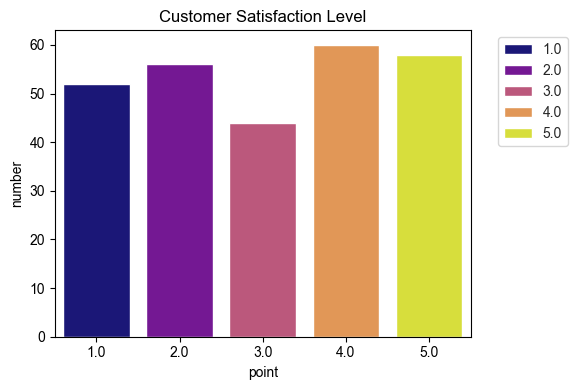

In [9]:
plotting(df['SatisfactionLevel'].value_counts(), 'barplot', 'Customer Satisfaction Level', 'point', 'number')

            mean       std
Gender                    
Female  2.883562  1.416700
Male    3.266129  1.437641


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9740\505305646.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.25, 1))


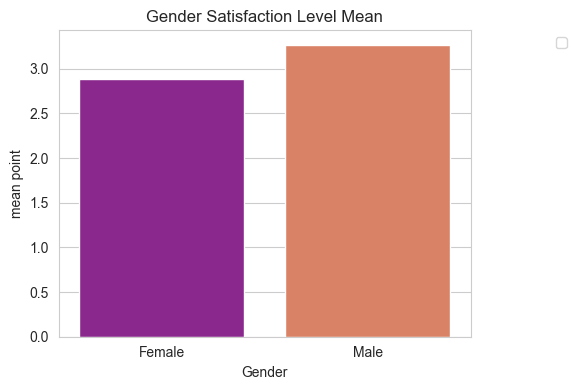

In [10]:
# Gender Satis faction Level

gender_group = df.groupby('Gender')['SatisfactionLevel'].agg(['mean', 'std'])
print(gender_group)
plotting(gender_group['mean'], 'barplot', 'Gender Satisfaction Level Mean', 'Gender', 'mean point')

In [11]:
# Correlation between 'Income', 'Age' & 'SatisfactionLevel'

corr_matrix = np.corrcoef([df['Income'], df['Age'], df['SatisfactionLevel']])
print("'Income', 'Age' , 'SatisfactionLevel'")
print(corr_matrix)

'Income', 'Age' , 'SatisfactionLevel'
[[ 1.         -0.03024344 -0.06399839]
 [-0.03024344  1.          0.01424128]
 [-0.06399839  0.01424128  1.        ]]


این ماتریس نشان می‌دهد که درآمد و میزان رضایت رابطه معناداری با هم ندارند. همچنین رابطه معناداری هم بین سن و میزان رضایت وجود ندارد.

In [12]:
# Convert 'string' & 'boolian' values to (0/1)

df['HasCreditCard_binary'] = df['HasCreditCard'].map(lambda x : 1 if x == True else 0)
df['Churned_binary'] = df['Churned'].map(lambda x : 1 if x == True else 0)

In [13]:
# Correlation between 'CreditCard' & 'SatisfactionLevel'

corr_matrix = np.corrcoef([df['HasCreditCard_binary'], df['SatisfactionLevel']])
print("'CreditCard', 'SatisfactionLevel'")
print(corr_matrix)

'CreditCard', 'SatisfactionLevel'
[[1.         0.07207555]
 [0.07207555 1.        ]]


این ماتریس هم نشان می‌دهد که رابطه‌ای بین داشتن کارت اعتباری و میزان رضایت مشتریان وجود ندارد.

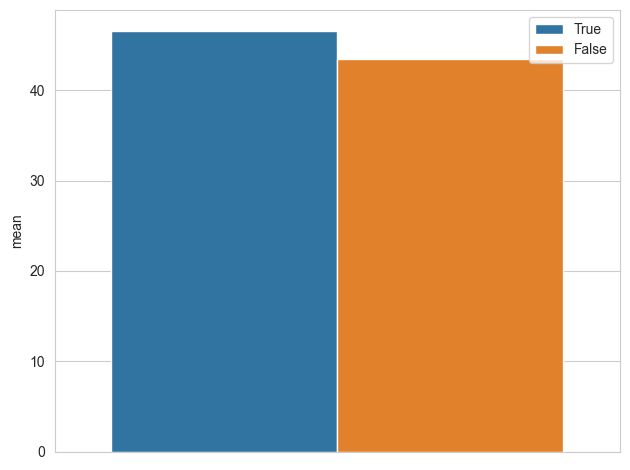

         count       mean
Churned                  
False      199  46.587605
True        71  43.443192


In [14]:
# Mean of Churned persons's Age

Churned_persons = df.groupby('Churned')['Age'].agg(['count', 'mean'])
sns.barplot(hue= ['True', 'False'], y = Churned_persons['mean']) 
plt.tight_layout()
plt.show()
print(Churned_persons)

 این نمودار نشان می‌دهد که میانگین سن افرادی که که از بانک خارج شده اند و افرادی که هنوز در بانک فعالیت دارند تقریبا برابر است و تفاوت معناداری بین آنها وجود ندارد.

             mean       std
Churned                    
False    1.984925  1.007434
True     2.154930  0.980494


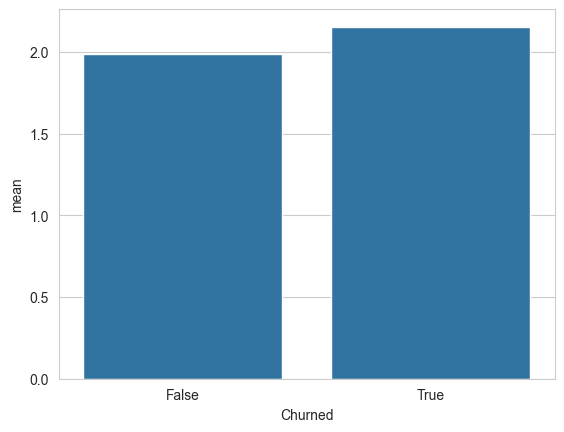

In [15]:
# Analysis of number of products in Churned and Unchurned persons. 

Churned_persons2 = df.groupby('Churned')['NumOfProducts'].agg(['mean', 'std'])
sns.barplot(Churned_persons2['mean'])
print(Churned_persons2)

این نمودار، نمودار میانگین تعداد خدمات افراد جداشده از بانک و افرادی که هنوز در بانک حساب دارند را نشان می‌دهد. همانطور که مشاهده می‌شود، هر دو گروه تقریباً میزان خدمات یکسانی از بانک دریافت می‌کنند. بنابراین، این عامل یعنی میزان خدمات نمی‌تواند معیاری برای جداشدن افراد از بانک باشد.

==== Number of churned persons with credit card ====
   Gender  Churned  HasCreditCard  Count
0  Female    False           True     74
1  Female    False          False     35
2  Female     True           True     29
3  Female     True          False      8
4    Male    False           True     66
5    Male    False          False     24
6    Male     True           True     21
7    Male     True          False     13

==== Number of churned persons ====
         count       mean
Churned                  
False      199  46.587605
True        71  43.443192



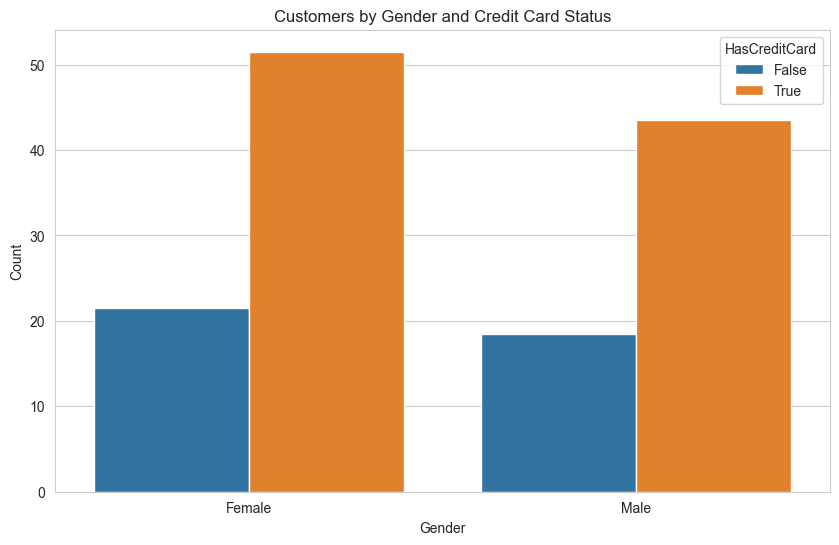

In [16]:


Churned_persons3 = df.groupby(['Gender', 'Churned'])['HasCreditCard'].value_counts().reset_index(name='Count')
print('==== Number of churned persons with credit card ====')
print(f'{Churned_persons3}\n') 
print('==== Number of churned persons ====')
print(f'{Churned_persons}\n')

plt.figure(figsize=(10,6))
sns.barplot(data=Churned_persons3, x='Gender', y='Count', hue='HasCreditCard', errorbar=None)

plt.title('Customers by Gender and Credit Card Status')
plt.ylabel('Count')
plt.show()

In [17]:
from scipy.stats import ttest_ind

# حذف مقادیر گمشده از ستون‌ها
group_with_card = df[df["HasCreditCard_binary"] == 1]["SatisfactionLevel"].dropna()
group_without_card = df[df["HasCreditCard_binary"] == 0]["SatisfactionLevel"].dropna()

# اجرای آزمون t-test مستقل
stat, p_value = ttest_ind(group_with_card, group_without_card, equal_var=False)  # فرض نابرابری واریانس‌ها

print("t-statistic =", stat)
print("p-value =", p_value)

# تفسیر نتیجه
alpha = 0.05
if p_value < alpha:
    print("✅ نتیجه: تفاوت معنادار آماری بین دو گروه وجود دارد.")
else:
    print("❌ نتیجه: تفاوت معناداری بین دو گروه مشاهده نشد.")


t-statistic = 1.226523442268669
p-value = 0.22178877064144592
❌ نتیجه: تفاوت معناداری بین دو گروه مشاهده نشد.


In [18]:
from scipy.stats import f_oneway

# ساخت گروه‌ها بر اساس تعداد محصول
groups = []
for n in sorted(df['NumOfProducts'].dropna().unique()):
    group = df[df['NumOfProducts'] == n]['SatisfactionLevel'].dropna()
    groups.append(group)

# اجرای ANOVA
stat, p_value = f_oneway(*groups)

print("F-statistic =", stat)
print("p-value =", p_value)

# تفسیر نتیجه
alpha = 0.05
if p_value < alpha:
    print("✅ نتیجه: تفاوت معناداری بین گروه‌های مختلف تعداد محصول در سطح رضایت وجود دارد.")
else:
    print("❌ نتیجه: تفاوت معناداری بین گروه‌ها مشاهده نشد.")


F-statistic = 0.7074574913731853
p-value = 0.5482969577888965
❌ نتیجه: تفاوت معناداری بین گروه‌ها مشاهده نشد.
